# 하이퍼파라미터와 튜닝 (1) 

## 17.1  Hyper-Parameter tune

In [1]:
#-- example,, Classifier의 튜닝
#model = Classifier(param1=1.0, param2=True, param3="linear")

## 17.2  hyperparameter of Logistic regression

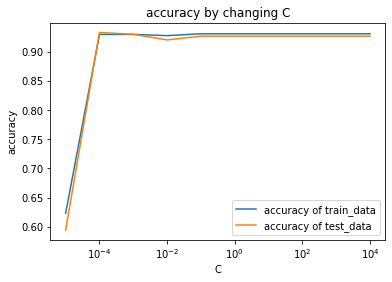

In [5]:
#--
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline


#-- 데이터 생성
X, y = make_classification(n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# C값의 범위
# (1e-5,1e-4,1e-3,0.01,0.1,1,10,100,1000,10000)

C_list = [10**i for i in range(-5, 5)]

#-
train_accuracy = []
test_accuracy = []

#--
for C in C_list:
    model = LogisticRegression(C=C, random_state=42)
    model.fit(train_X, train_y)
    train_accuracy.append(model.score(train_X, train_y))
    test_accuracy.append(model.score(test_X, test_y))
    
# semilogx(),, ::  x의 스케일을 10의 x승의 스케일로 변경다
plt.semilogx(C_list, train_accuracy, label="accuracy of train_data")
plt.semilogx(C_list, test_accuracy, label="accuracy of test_data")
plt.title("accuracy by changing C")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
plt.show()


## 17.3  선형 SVM의 하이퍼파라미터

/home/max/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/max/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


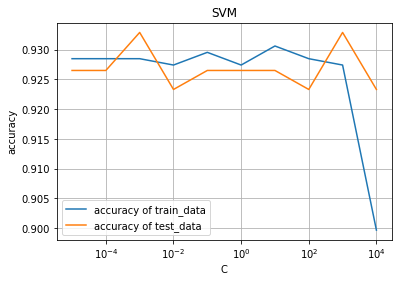

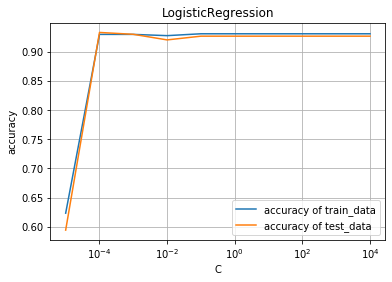

In [10]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#--
X, y = make_classification(n_samples=1250, n_features=4, n_informative=2, n_redundant=2,random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

#
C_list = [10**i for i in range(-5, 5)]

#
svm_train_accuracy = []
svm_test_accuracy = []
log_train_accuracy = []
log_test_accuracy = []

#--
for C in C_list:
    model1 = LinearSVC(C=C, random_state=42)
    model1.fit(train_X, train_y)
    svm_train_accuracy.append(model1.score(train_X, train_y))
    svm_test_accuracy.append(model1.score(test_X, test_y))
    
    model2 = LogisticRegression(C=C, random_state=42)
    model2.fit(train_X, train_y)
    log_train_accuracy.append(model2.score(train_X, train_y))
    log_test_accuracy.append(model2.score(test_X, test_y))

#--
fig = plt.figure()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.set_title("SVM")
ax.set_xlabel("C")
ax.set_ylabel("accuracy")
ax.semilogx(C_list, svm_train_accuracy, label="accuracy of train_data")
ax.semilogx(C_list, svm_test_accuracy, label="accuracy of test_data")
ax.legend()
ax.plot()
plt.show()
#--
fig2 =plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
ax2.grid(True)
ax2.set_title("LogisticRegression")
ax2.set_xlabel("C")
ax2.set_ylabel("accuracy")
ax2.semilogx(C_list, log_train_accuracy, label="accuracy of train_data")
ax2.semilogx(C_list, log_test_accuracy, label="accuracy of test_data")
ax2.legend()
ax2.plot()
plt.show()


## 17.4 비선형 SVM의 하이퍼 파라미터

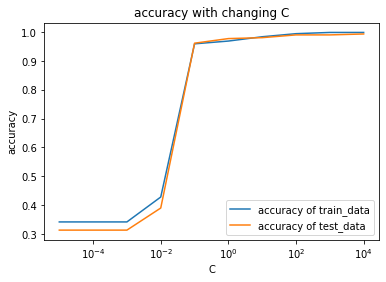

In [12]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

#--
X, y = make_gaussian_quantiles(n_samples=1250, n_features=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

#--
C_list = [10 ** i for i in range(-5, 5)]

#--
train_accuracy = []
test_accuracy = []

#----
for C in C_list:
    model = SVC(C=C)
    model.fit(train_X, train_y)
    train_accuracy.append(model.score(train_X, train_y))
    test_accuracy.append(model.score(test_X, test_y))


#--
plt.semilogx(C_list, train_accuracy, label="accuracy of train_data")
plt.semilogx(C_list, test_accuracy, label="accuracy of test_data")
plt.title("accuracy with changing C")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
plt.show()


### random_state

In [13]:
import numpy as np
from sklearn.svm import SVC

#--
random_state = np.random.RandomState()

# 비선형 SVM 모델 (난수 생성기  random_state 지정)
model = SVC(random_state = random_state)


In [15]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

#--
X, y = make_classification(n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

#--
random_state = np.random.RandomState()

#
model = SVC(random_state=random_state)

#-- training
model.fit(train_X, train_y)

#-- accuracy
print(model.score(test_X, test_y))



0.9488817891373802


### linear / rbf / poly / sigmoid

In [17]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#
X, y = make_classification(n_samples=1250, n_features=4, n_informative=2, n_redundant=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

kernel_list = ['linear','rbf','poly','sigmoid']

#--
for i in kernel_list:
    model = SVC(kernel= i ,random_state=42)
    #--training
    model.fit(train_X, train_y)
    
    #--accuracy
    print(i)
    print(model.score(test_X, test_y))
    print()


linear
0.9329073482428115

rbf
0.9488817891373802

poly
0.9361022364217252

sigmoid
0.9265175718849841

